<a href="https://colab.research.google.com/github/Prakharava/ML-Data-Science/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/car_price.csv')

In [ ]:
data.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [ ]:
data.describe()

,Unnamed: 0,year,selling_price,km_driven,seats,max_power (in bph),Mileage,Engine (CC)
count,2095.000000,2095.000000,2.095000e+03,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000
mean,3155.537947,2014.052506,4.272799e+05,67413.593795,5.096897,77.410427,21.397928,1205.078282
std,1791.039215,3.273451,2.326698e+05,41580.846333,0.457000,19.884938,1.209234,245.058696
min,0.000000,2000.000000,4.595700e+04,1000.000000,4.000000,35.000000,19.600000,624.000000
25%,1589.500000,2012.000000,2.500000e+05,35000.000000,5.000000,67.040000,20.360000,998.000000
50%,3185.000000,2014.000000,3.900000e+05,60000.000000,5.000000,74.000000,21.100000,1248.000000
75%,4709.500000,2017.000000,5.555000e+05,90000.000000,5.000000,88.730000,22.540000,1396.000000
max,6256.000000,2020.000000,1.594000e+06,270000.000000,8.000000,126.320000,23.590000,1598.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB


In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
seats,0


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
seats,0


In [ ]:
data.isnull()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2091,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2092,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2093,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Convert the 'name' column to a categorical type.
data['name'] = data['name'].astype('category')

# Calculate the correlation matrix only for numeric columns.
data.corr(numeric_only=True)

,Unnamed: 0,year,selling_price,km_driven,seats,max_power (in bph),Mileage,Engine (CC)
Unnamed: 0,1.000000,0.006433,0.031790,0.067286,-0.005489,0.058406,0.035492,0.055397
year,0.006433,1.000000,0.669213,-0.469055,0.009686,0.293524,0.251596,0.185846
selling_price,0.031790,0.669213,1.000000,-0.239156,0.137711,0.677668,0.179155,0.568887
km_driven,0.067286,-0.469055,-0.239156,1.000000,0.066014,0.090387,0.062393,0.250732
seats,-0.005489,0.009686,0.137711,0.066014,1.000000,0.054139,-0.105186,0.034715
max_power (in bph),0.058406,0.293524,0.677668,0.090387,0.054139,1.000000,0.135230,0.850453
Mileage,0.035492,0.251596,0.179155,0.062393,-0.105186,0.135230,1.000000,0.215813
Engine (CC),0.055397,0.185846,0.568887,0.250732,0.034715,0.850453,0.215813,1.000000


In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'Mileage Unit']

In [ ]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [ ]:
X = data.drop(columns=['selling_price'])
y = data['selling_price']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the linear regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

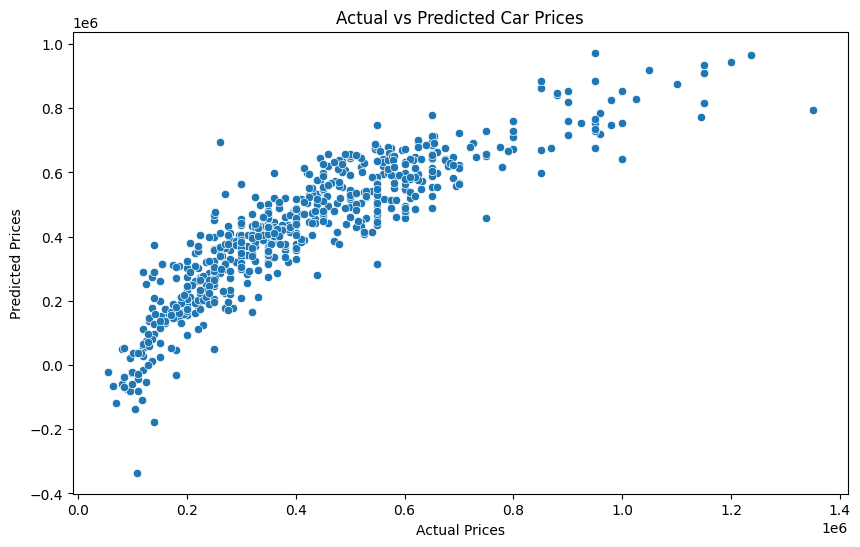

In [ ]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()

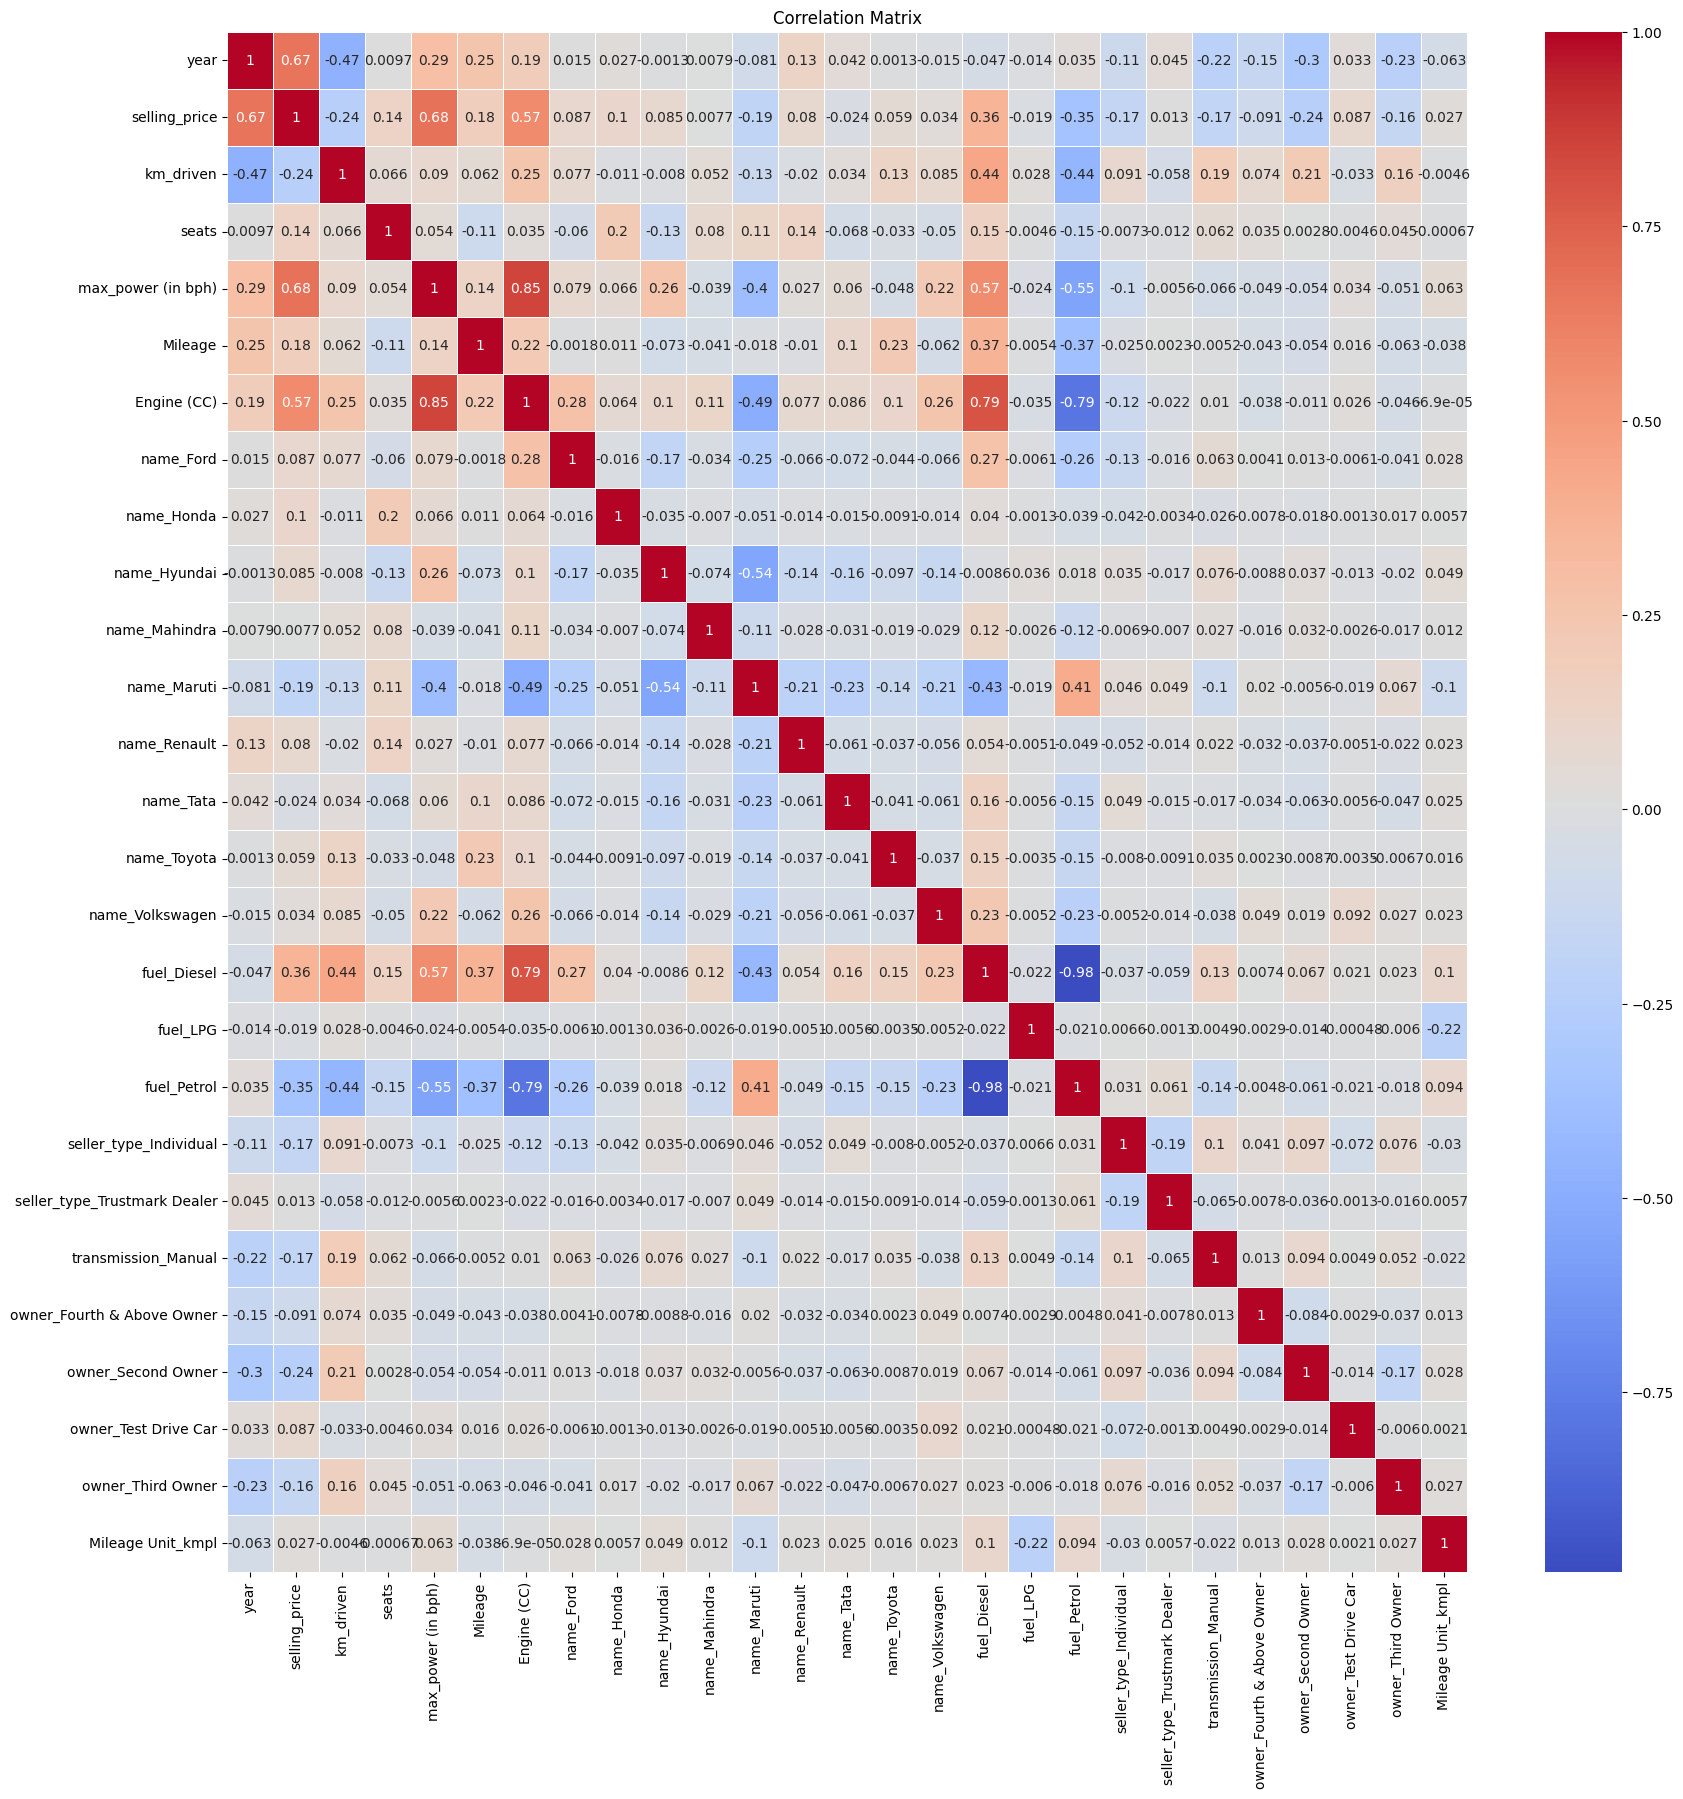

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Root Mean Squared Error (RMSE): 105162.93512544685
Mean Absolute Error (MAE): 79836.45432080698
R² Score: 0.775114923620995
